# Project 1: EDA: King County House Pricing Data Set
## Final Project Submission

Please fill out:
* Student name: Bendix Haß


## Setup

Core setup for the Notebook. You will find all imported packages etc. here.

In [551]:
reset -fs

In [552]:
# If folium is not installed yet, run following line:
# conda install -c conda-forge folium -y

In [553]:
import numpy as np
import pandas as pd
import datetime

from scipy import stats
import scipy.optimize as opt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
import folium as folium
import branca.colormap as cm

In [554]:
from sklearn import preprocessing
from sklearn import metrics
from sklearn.utils import check_array
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

## Business Understanding

Ask relevant questions and define objectives for the problem that need to be tackled

### Fictional business case: Prefabricator analyzing market segment in and around Seattle
* apartments (lot < 2500sqft) and houses (lot < 20000sqft)
* only "budget" housing <1mio\$

### Building Condition

An indicator for building condition in the dataset is defined as follows:

[Source](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

Relative to age and grade. Coded 1-5.

    1 = Poor- Worn out.
    2 = Fair- Badly worn.
    3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing.
    4 = Good- No obvious maintenance required.
    5= Very Good- All items well maintained.

### Building Grade

An indicator for building grade in the dataset is defined as follows:

[Source](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

    1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
    4 Generally older, low quality construction. Does not meet code.
    5 Low construction costs and workmanship. Small, simple design.
    6 Lowest grade currently meeting building code. Low quality materials and simple designs.
    7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
    8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
    9 Better architectural design with extra interior and exterior design and quality.
    10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
    11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
    12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
    13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

## Data Mining

Gather and scrape the data necessary for the project

### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** - Price: is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of Bathrooms/House
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [555]:
df = pd.read_csv('King_County_House_prices_dataset.csv', delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [556]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [557]:
df.tail(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


## Data Cleaning

Fix the inconsistencies within the data and handle the missing values

### Handling NaN
We have missing data in the Features: **view**, **waterfront** and **yr_renovated**. Those will be dealt with.

In [558]:
df.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [559]:
# Sequence data by continuous/categorical/misc
continuous = ['date', 'price', 'bedrooms', 'bathrooms'
              , 'sqft_living', 'sqft_lot', 'floors'
              , 'sqft_above', 'sqft_basement', 'yr_built'
              , 'yr_renovated', 'zipcode', 'lat', 'long'
              , 'sqft_living15', 'sqft_lot15']

categorical = ['waterfront', 'view', 'condition', 'grade']
misc = ['id']

# all([i in continuous+categorical+misc for i in df.columns]) #to check

In [560]:
# I wonder why baths is a floating point variable
df.bathrooms.unique()

# conclusion: it follows a calculation of quarter baths
# bath: toilet = 0.25, toilet + sink = 0.5, toilet + sink + shower = 0.75, toilet + sink + shower + tub = 1

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [561]:
# I wonder why floors is a floating point variable
df.floors.unique()

# conclusion: stories under a pitched roof are .5 floors

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [562]:
# I wonder why waterfront is a floating point variable
df.waterfront.unique()

# conclusion: can be casted to integer after NaNs are handled

array([nan,  0.,  1.])

In [563]:
# What is the expected value for waterfront?
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [564]:
# <1% are at a waterfront.
# I will replace nan-values by 0 (not expected to be at waterfront)
df.waterfront.replace(to_replace=[np.nan], value=0, inplace=True);

In [565]:
# I wonder why view is a floating point variable
df.view.unique()

# conclusion: view can be casted to int64 after handling NaNs

array([ 0., nan,  3.,  4.,  2.,  1.])

In [566]:
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [567]:
# ~10% have a view of 0.
# I will replace nan-values by 0
df.view.replace(to_replace=[np.nan], value=0, inplace=True);

In [568]:
# I wonder why yr_renovated is a floating point variable
df.yr_renovated.unique()

# conclusion: yr_renovated can be casted to int64 after handling NaNs

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [569]:
df.yr_renovated.value_counts(dropna=False)
# 79% has not been renovated
# 18% is NaN
# conclusion: NaN will be replaced by 0
df.yr_renovated.replace(to_replace=[np.nan], value=0, inplace=True);

In [570]:
# I wonder why sqft_basement is of type object
df.sqft_basement.unique()

# conclusion: sqft_basement contains '?' but could be casted to int64

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [571]:
# sqft_basement has '?' values. 
# It cannot be casted to int64
# Those '?' will be replaced by the mode
df.sqft_basement.replace(to_replace=['?'], value=df.sqft_basement.mode(), inplace=True);

### Data types

Most of the data types are expected. Unexpected are listed below:
1. **date** should be a DateTime type
2. **price** can be integer. Decimal float point values are of no interest
3. **bathrooms** follows this calculation: [bath](https://illinado.com/what-is-a-quarter-bath/)
4. **floors** .5-values are pitched-roof stories
5. **waterfront**, **view**, **yr_renovated**, **sqft_basement** can be cast to integer

In [572]:
# Casting Series types:
df.date = pd.to_datetime(df.date)

# casting from object -> float -> round -> int necessary
for feat in ['price', 'waterfront', 'view', 'yr_renovated', 'sqft_basement']:
    df[feat] = df[feat].astype(float).round(0).astype(int)

In [573]:
df.date.max()

Timestamp('2015-05-27 00:00:00')

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(16)
memory usage: 3.5 MB


### Inconsistent data:
1. **ID**: some houses seem to be doubled: dataset has 21597 entries but only 21420 unique IDs
2. **bedrooms**: we seem to have 1 data point with 30+ bedrooms, we will get rid of this one

In [575]:
df.drop(inplace=True, index=df[df.bedrooms > 30].index)

In [576]:
df.id.value_counts()

795000620     3
1825069031    2
9136103130    2
4222310010    2
7129304540    2
1781500435    2
3969300030    2
2560801222    2
3883800011    2
2228900270    2
251300110     2
5282200015    2
2787460720    2
5536100020    2
2568300045    2
8648900110    2
8910500150    2
8651402750    2
8820903380    2
4435000705    2
5430300171    2
641900050     2
1823049202    2
8121100395    2
6308000010    2
9222400605    2
1432400120    2
4345000510    2
7409700215    2
3293700496    2
             ..
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
2770603522    1
2738640470    1
9238480020    1
9492500170    1
2607740100    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
1931300035    1
1922000070    1
8165500110    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21419,

### Market segment - lot area, pricing, luxury, housetypes etc.

 Market segment - lot area and pricing

The following plots will show some detailed decisions about the market segment. The results will be listed below:

1. The lot area below 20000 $ft^2$ is about 90% if the market segment
2. Houses (incl. lot) below 1 mio USD also are about 90% of the market segment
3. Houses older than 1960s are overly attractive (will be dropped)
4. Portfolio:
    1. up until 3 bathrooms recommended
    2. up until 5 bedrooms recommended
    3. up until 2 floors recommended

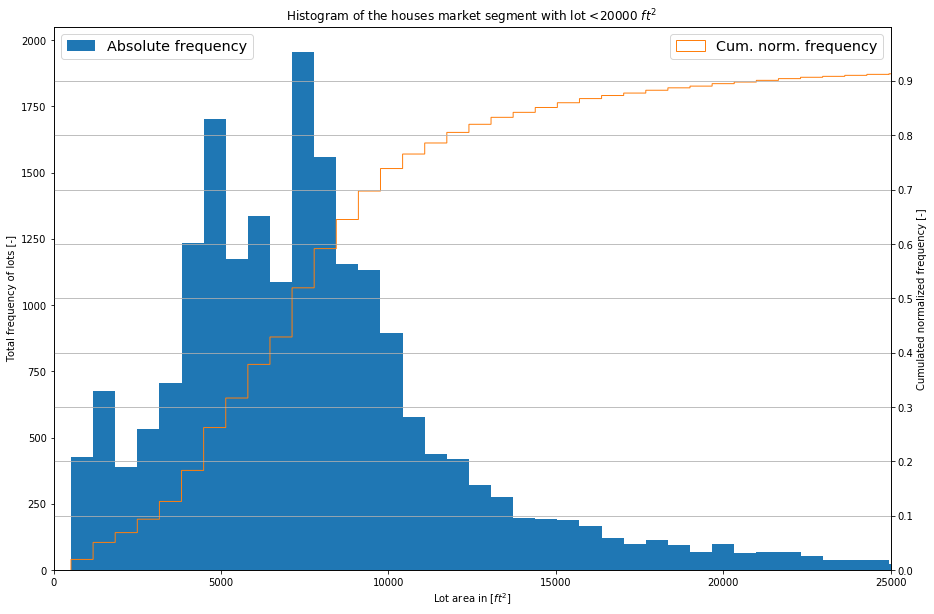

In [577]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
bins = 2500
fontsize = 'x-large'
labelsize = 20

ax1.set(xlabel='Lot area in [$ft^2$]'
       , ylabel='Total frequency of lots [-]')

ax2.set(xlim=(0, 25e3)
        , ylim=(0, 1)
        , yticks=np.arange(0, 1, step=0.1)
        , ylabel='Cumulated normalized frequency [-]'
        , title='Histogram of the houses market segment with lot <20000 $ft^2$')
ax2.grid(True)

hst1 = ax1.hist(
    df.sqft_lot
    , bins=bins
    , density=False
    , label='Absolute frequency')

ax1.legend(loc='upper left', fontsize=fontsize)

hst2 = ax2.hist(
    df.sqft_lot, cumulative=1
    , histtype='step'
    , bins=bins
    , color='tab:orange'
    , density=True
    , label='Cum. norm. frequency')

ax2.legend(fontsize=fontsize)

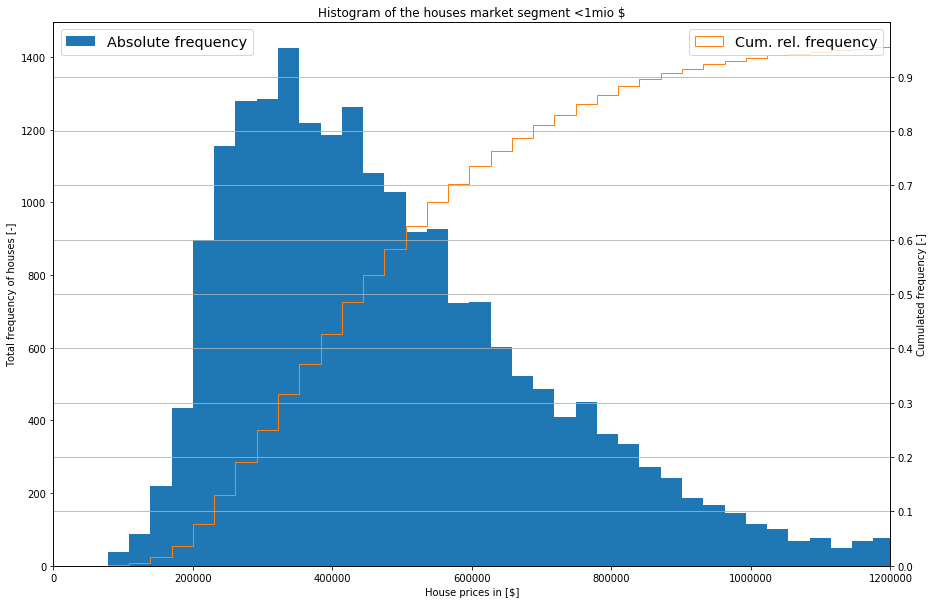

In [578]:
fig, ax1 = plt.subplots(figsize=(15, 10))
ax2 = ax1.twinx()
bins = 250
fontsize = 'x-large'
labelsize = 20

ax1.set(xlabel='House prices in [\$]'
       , ylabel='Total frequency of houses [-]')

ax2.set(xlim=(0, 12e5)
        , ylim=(0, 1)
        , yticks=np.arange(0, 1, step=0.1)
        , ylabel='Cumulated frequency [-]'
        , title='Histogram of the houses market segment <1mio $')

ax2.grid(True)

hst1 = ax1.hist(
    df.price
    , bins=bins
    , density=False
    , label='Absolute frequency')

ax1.legend(loc='upper left', fontsize=fontsize)

hst2 = ax2.hist(
    df.price
    , cumulative=1
    , histtype='step'
    , bins=bins
    , color='tab:orange'
    , density=True
    , label='Cum. rel. frequency')

ax2.legend(fontsize=fontsize)

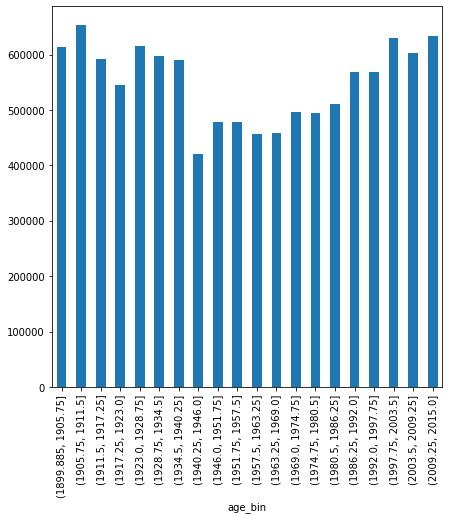

In [579]:
df_tmp = df.copy()
df_tmp['age_bin'] = pd.cut(df.yr_built, bins=20)
df_tmp.groupby(by='age_bin').price.mean().plot(kind='bar'
    , figsize=(7, 7))

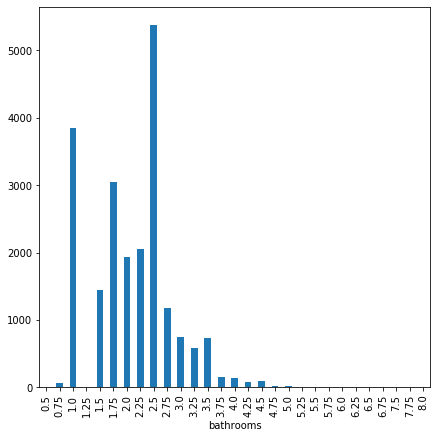

In [580]:
df_tmp.groupby(by='bathrooms').bathrooms.count().plot(kind='bar'
    , figsize=(7, 7))

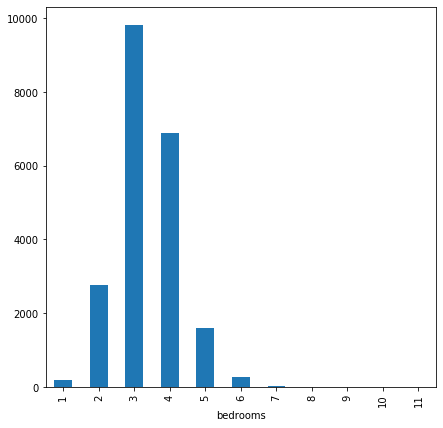

In [581]:
df_tmp.groupby(by='bedrooms').bedrooms.count().plot(kind='bar'
    , figsize=(7, 7))

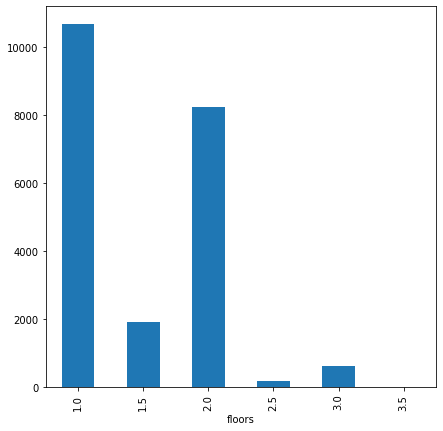

In [582]:
df_tmp.groupby(by='floors').floors.count().plot(kind='bar'
    , figsize=(7, 7))

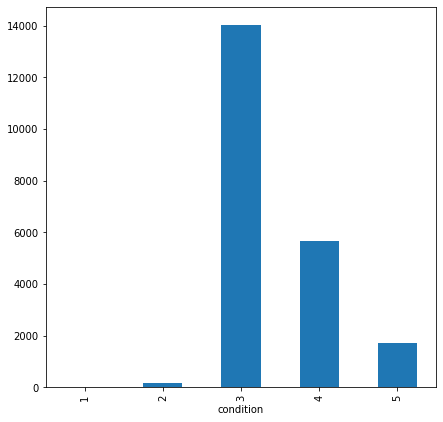

In [583]:
df_tmp.groupby(by='condition').condition.count().plot(kind='bar'
    , figsize=(7, 7))

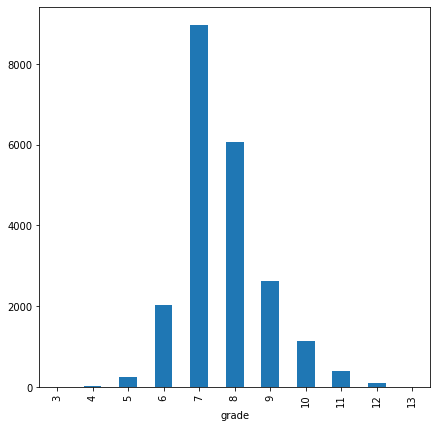

In [584]:
df_tmp.groupby(by='grade').grade.count().plot(kind='bar'
    , figsize=(7, 7))

We took a look at the distribution of the market segment. The portfolio is well represented within the market after all. We will filter out the rows outside of the portfolio to better represent the portfolio with the dataset.

In [585]:
df.drop(index=df[df['bathrooms'] > 2.5].index, inplace=True, axis=0)
df.drop(index=df[df['bedrooms'] > 5].index, inplace=True, axis=0)
df.drop(index=df[df['floors'] > 2].index, inplace=True, axis=0)
df.drop(index=df[df['condition'] < 3].index, inplace=True, axis=0)
df.drop(index=df[df['grade'] < 7].index, inplace=True, axis=0)
df.shape
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### Key indicators of luxury location: waterfront

As feature waterfront is too onesided and might outperform other features as attractor or impulse to buy a house. We will get rid of this feature because it is a key indicator of the lot and not the house.

1. **waterfront** other that 0 lines will be dropped because they are noted as luxury lots. Features will be dropped after.
2. **sqft_lot** above 20000 ft^2 rows will be dropped

### Unnecessary features

1. **id** implies no insight, feature will be dropped
2. **sqft_lot**, **view**, **yr_renovated**, **zipcode**, **lat**, **long**, **sqft_living15**, **sqft_lot15** are features we wont be able to define as indicators without a precise project including precise project area. But we will keep those for now for some additional analysis later.

### Filtering Dataset for Business Case
1. Applying filters from business case:
    1. sqft_lot < 20000
    2. price < 1 mio\$
    3. waterfront = 0
    4. view = 0

In [586]:
for feat in ['waterfront', 'view']:
    df.drop(inplace=True, index=df[df[feat] > 0].index)

df.drop(index=df[df['sqft_lot'] > 2e5].index, inplace=True, axis=0)
df.drop(index=df[df['price'] > 1e6].index, inplace=True, axis=0)
df.drop(columns=['waterfront', 'view', 'id'], inplace=True, axis=1);

## Data Exploration

Now that our data is clean and all datatypes are adjusted we can continue with the data exploration. We will find hypothesis about your defined problem by visually analyze the data

### Correlation Matrix - find unrelated features
First of all lets take a look at the correlation matrix

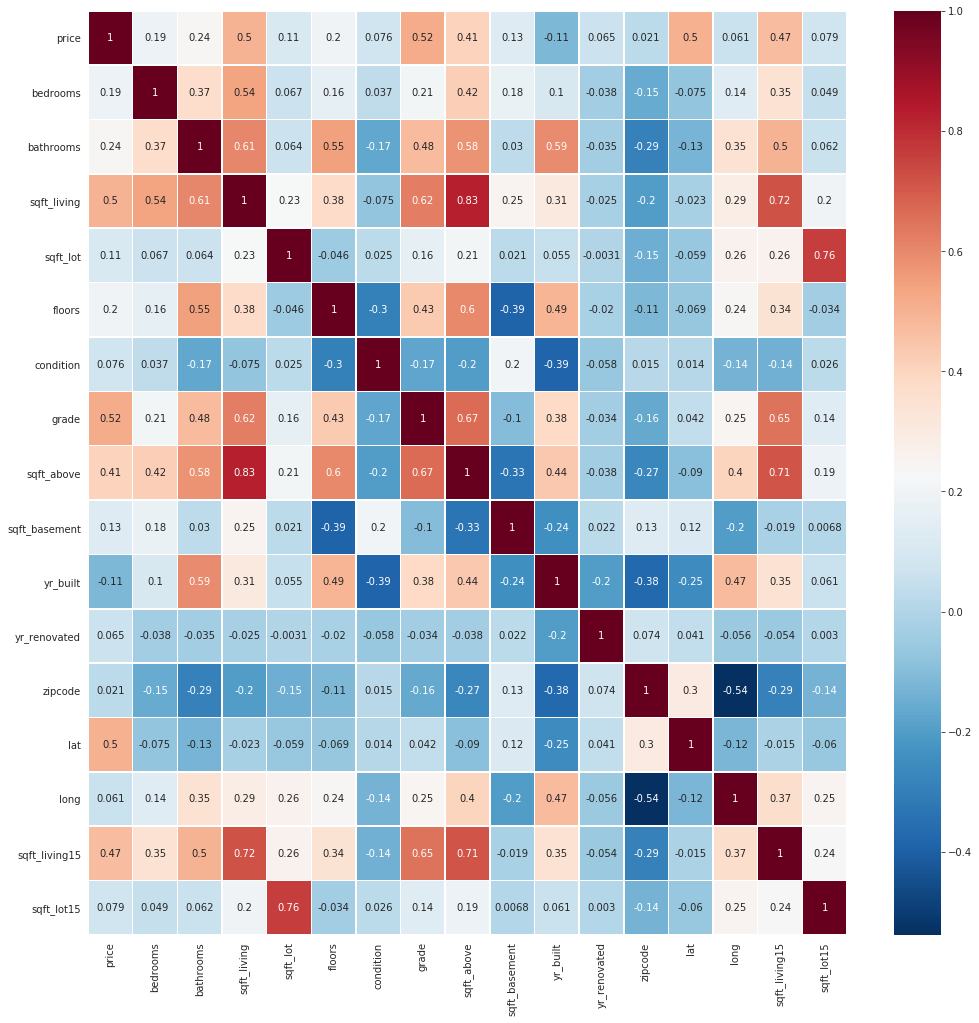

In [587]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(17, 17))
    ax = sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="RdBu_r")

### Pairplot - How about the distributions? 
Also interesting is the pairplot. To have a slim overview we need to sort out some of the features. This is an iterative process. First of all lets sort out some seemingly uncorrelated features because we probably wont get insights of them in the pairplot.

+ sqft_lot15
+ lat
+ zipcode
+ yr_built
+ condition
+ sqft_lot
+ id
+ waterfront

The remaining will be set in 3 sets. All sets will contain the target feature **price**

In [588]:
# Filter some misc and categorical features that won't add insights to the plot
sorted_out = ['id', 'lat', 'zipcode']

no_pairplot = ['price', 'sqft_lot15', 'yr_built'
              , 'condition', 'sqft_lot']

showpairplot = [i for i in df.columns 
                if (i not in no_pairplot) and 
               (i not in sorted_out)]

sets = [showpairplot[:5]+['price'], showpairplot[4:8]+['price'], showpairplot[8:]+['price']]

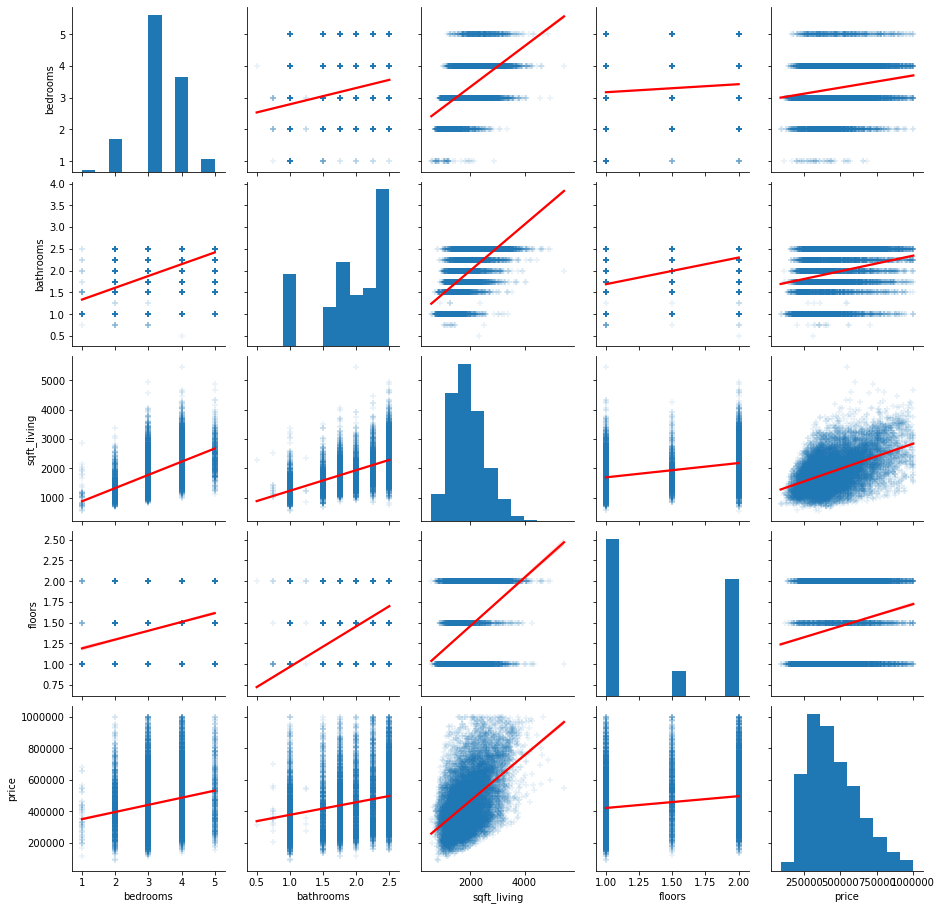

In [589]:
sns.pairplot(df[sets[0]]
             , markers="+", kind='reg'
             , plot_kws={'line_kws':{'color':'red'}
                         , 'scatter_kws': {'alpha': 0.1}}
            )

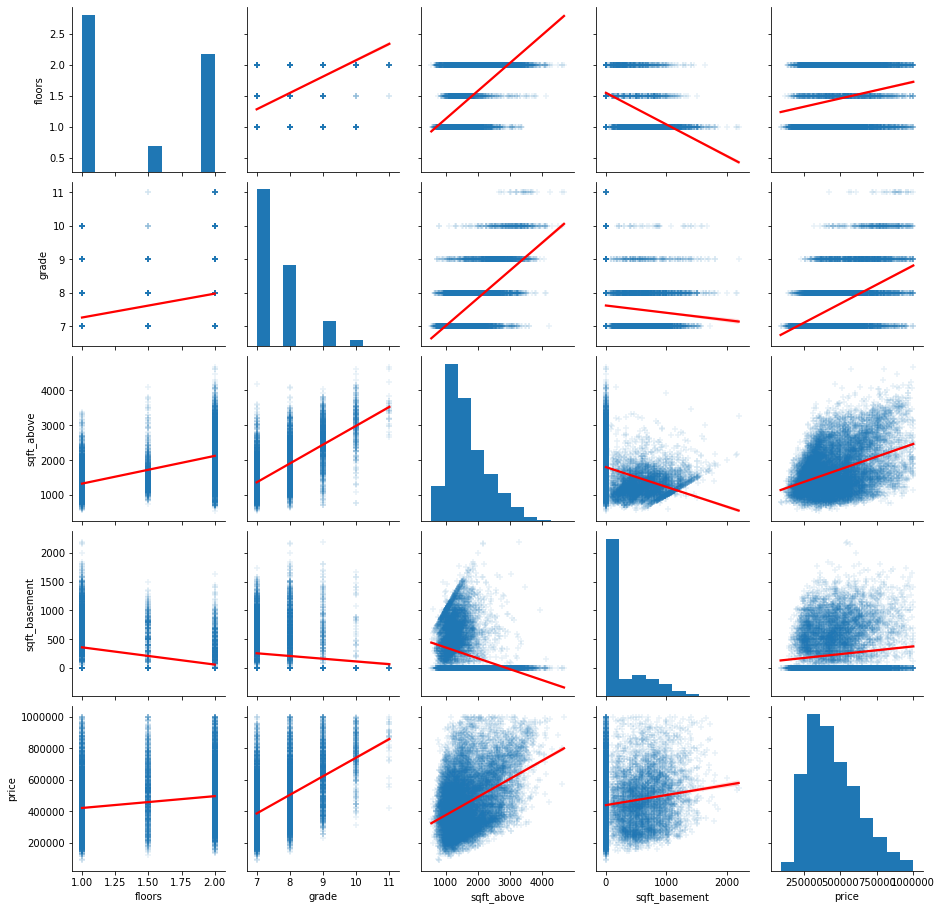

In [590]:
sns.pairplot(df[sets[1]]
             , markers="+", kind='reg'
             , plot_kws={'line_kws':{'color':'red'}
                         , 'scatter_kws': {'alpha': 0.1}}
            )

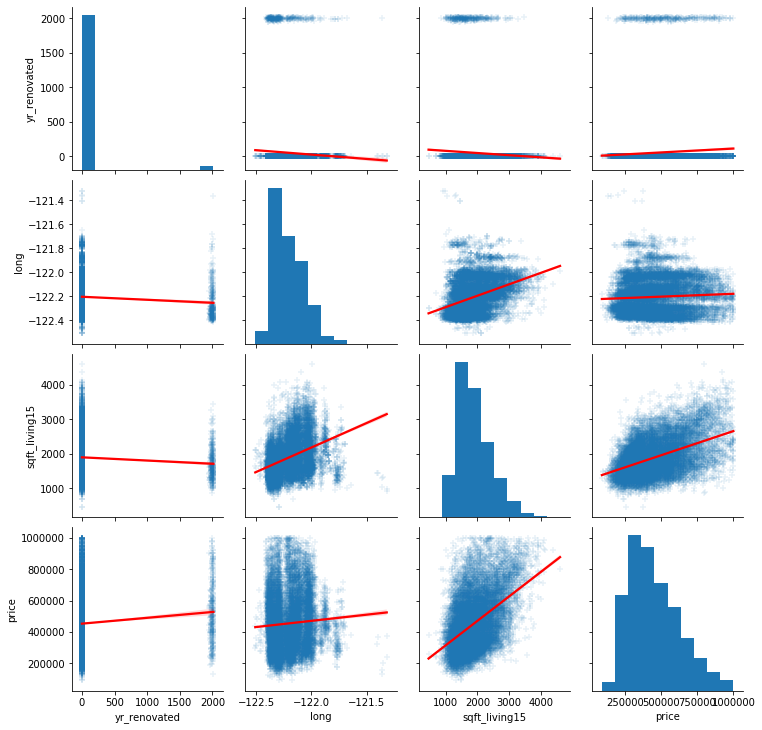

In [591]:
sns.pairplot(df[sets[2]]
             , markers="+", kind='reg'
             , plot_kws={'line_kws':{'color':'red'}
                         , 'scatter_kws': {'alpha': 0.1}}
            )

### Let's take a look at the outsorted features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a649e8eb8>,
      dtype=object)

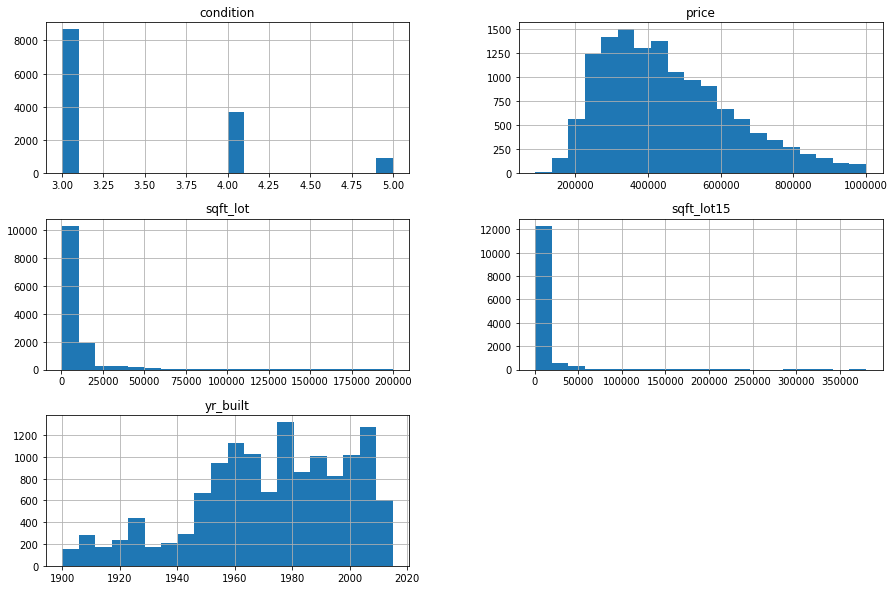

In [592]:
df[no_pairplot].hist(figsize=(15, 10), bins=20)

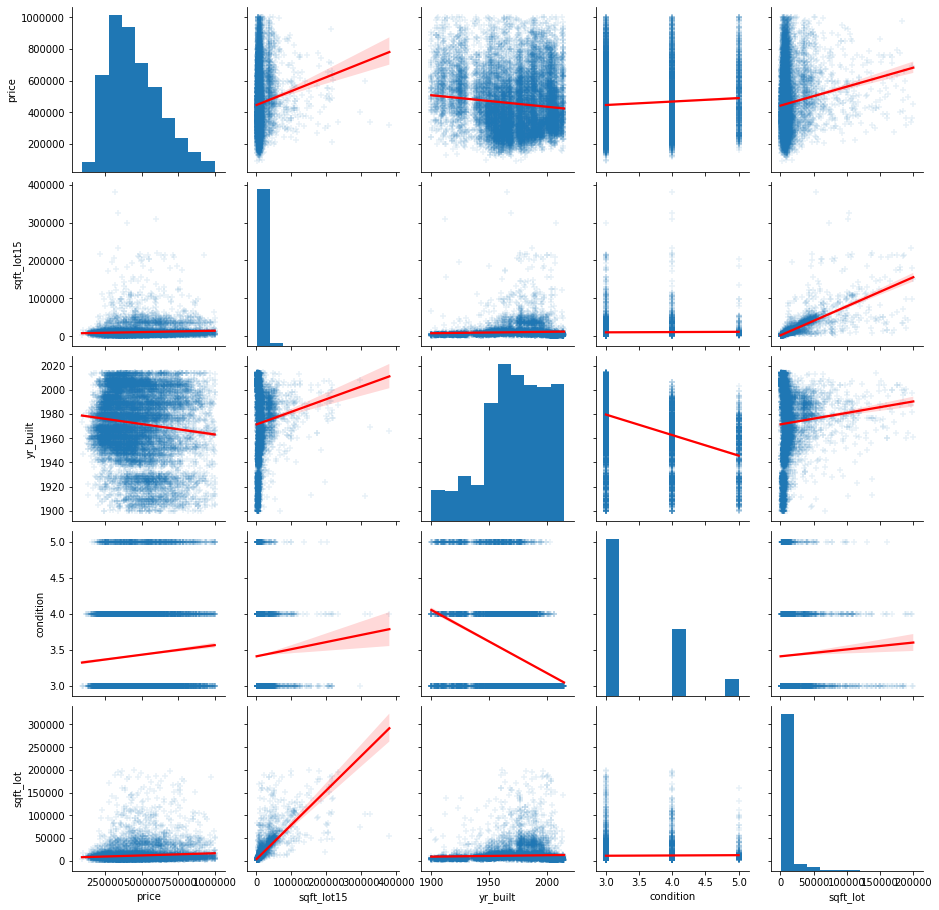

In [593]:
sns.pairplot(df[no_pairplot]
             , markers="+", kind='reg'
             , plot_kws={'line_kws':{'color':'red'}
                         , 'scatter_kws': {'alpha': 0.1}}
            )

## Feature Engineering

Select important features and construct more meaningful ones using the raw data that we have.

### Feature: inflation and housing dearness adjustment

We will adjust the prices in the dataset for the current year 2020.
This feature probably won't increase test-set prediction quality but since we need to extrapolate to the year 2020 we will increase the quality of predictions for further business decisions.

https://fred.stlouisfed.org/series/ATNHPIUS53033A

| year | index |
| ---- | ------ |
| 2014 | 156.44 |
| 2015 | 168.53 |
| 2016 | 190.37 |
| 2017 | 215.14 |
| 2018 | 236.72 | 

In [594]:
a = [156.44, 168.53, 190.37, 215.14, 236.72]
p_inc = np.mean([(a[i+1]-a[i])/a[i] for i in range(len(a)-1)])

Which gives us a mean index increase of about 11% per year. We will extrapolate this further until 2020. The index is not inflation adjusted, so we do not need to consider inflation additionally.

In [595]:
df['price_adj'] = df.price * (p_inc + 1) ** np.float64((pd.Timestamp.now()-df.date).dt.days/365)

Reminder: As we discounted the prices over the years, we wont be using the **date** feature as an indicator anymore. We adjusted the dataset prices by the real pricing increase over the years. 

### Feature: relative Housing price $\left[\frac{\$ }{ft^2}\right]$

Typical indicator is a relative price per living area. We will create this feature with the total area of the house. Since the goal is to predict the total house price, we wont use this feature because of colinearity but as an indicator of favourable locations later.

In [596]:
df['spec_price'] = df.price/df.sqft_living

### Age

Instead of using **yr_built** and **yr_renovated** we will define a feature age, which will be the nearest of those dates.

In [597]:
df['age'] = df.yr_built.combine(df.yr_renovated, max)
df[['age', 'yr_built', 'yr_renovated']].head()

,age,yr_built,yr_renovated
0,1955,1955,0
1,1991,1951,1991
4,1987,1987,0
6,1995,1995,0
7,1963,1963,0


### Categorical Features

We will create dummy variables for categorical features. This will be zipcode

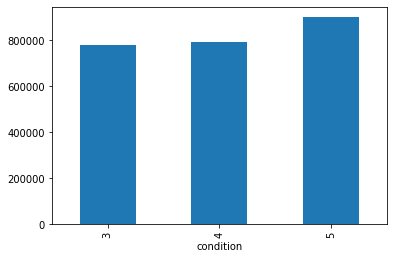

In [598]:
df.groupby(by='condition').price_adj.mean().plot(kind='bar')

_tmp = pd.get_dummies(df.condition, drop_first=True, prefix='cond_')
df = df.join(_tmp)
df.drop(labels='condition', axis=1, inplace=True)

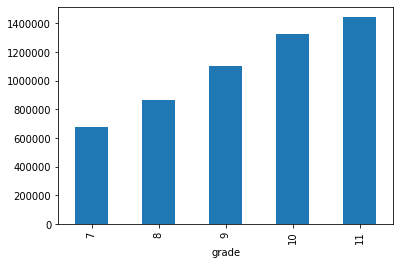

In [599]:
df.groupby(by='grade').price_adj.mean().plot(kind='bar')

_tmp = pd.get_dummies(df.grade, drop_first=True, prefix='grade_')
df = df.join(_tmp)
df.drop(labels='grade', axis=1, inplace=True)

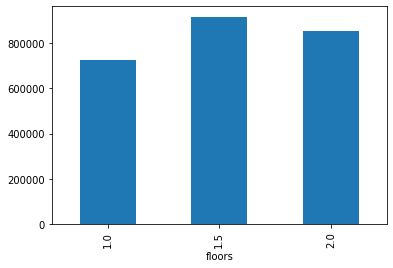

In [600]:
df.groupby(by='floors').price_adj.mean().plot(kind='bar')

In [601]:
for col in ['condition', 'floors', 'grade']:
    _tmp = pd.get_dummies(df[col], drop_first=True, prefix=col+'_')
    df = df.join(_tmp)
    df.drop(labels=col, axis=1, inplace=True)

In [602]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_adj', 'spec_price',
       'age', 'condition__4', 'condition__5', 'floors__1.5', 'floors__2.0',
       'grade__8', 'grade__9', 'grade__10', 'grade__11'],
      dtype='object')

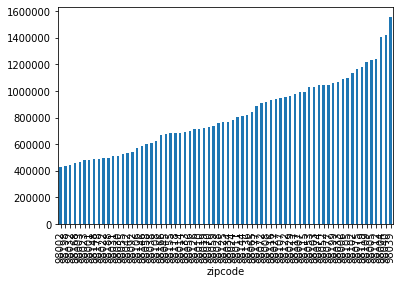

In [603]:
df.groupby(by='zipcode').price_adj.mean().sort_values().plot(kind='bar')

### Overview

In [604]:
len(df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 21596
Data columns (total 26 columns):
date             13281 non-null datetime64[ns]
price            13281 non-null int64
bedrooms         13281 non-null int64
bathrooms        13281 non-null float64
sqft_living      13281 non-null int64
sqft_lot         13281 non-null int64
sqft_above       13281 non-null int64
sqft_basement    13281 non-null int64
yr_built         13281 non-null int64
yr_renovated     13281 non-null int64
zipcode          13281 non-null int64
lat              13281 non-null float64
long             13281 non-null float64
sqft_living15    13281 non-null int64
sqft_lot15       13281 non-null int64
price_adj        13281 non-null float64
spec_price       13281 non-null float64
age              13281 non-null int64
condition__4     13281 non-null uint8
condition__5     13281 non-null uint8
floors__1.5      13281 non-null uint8
floors__2.0      13281 non-null uint8
grade__8         13281 non-null uint

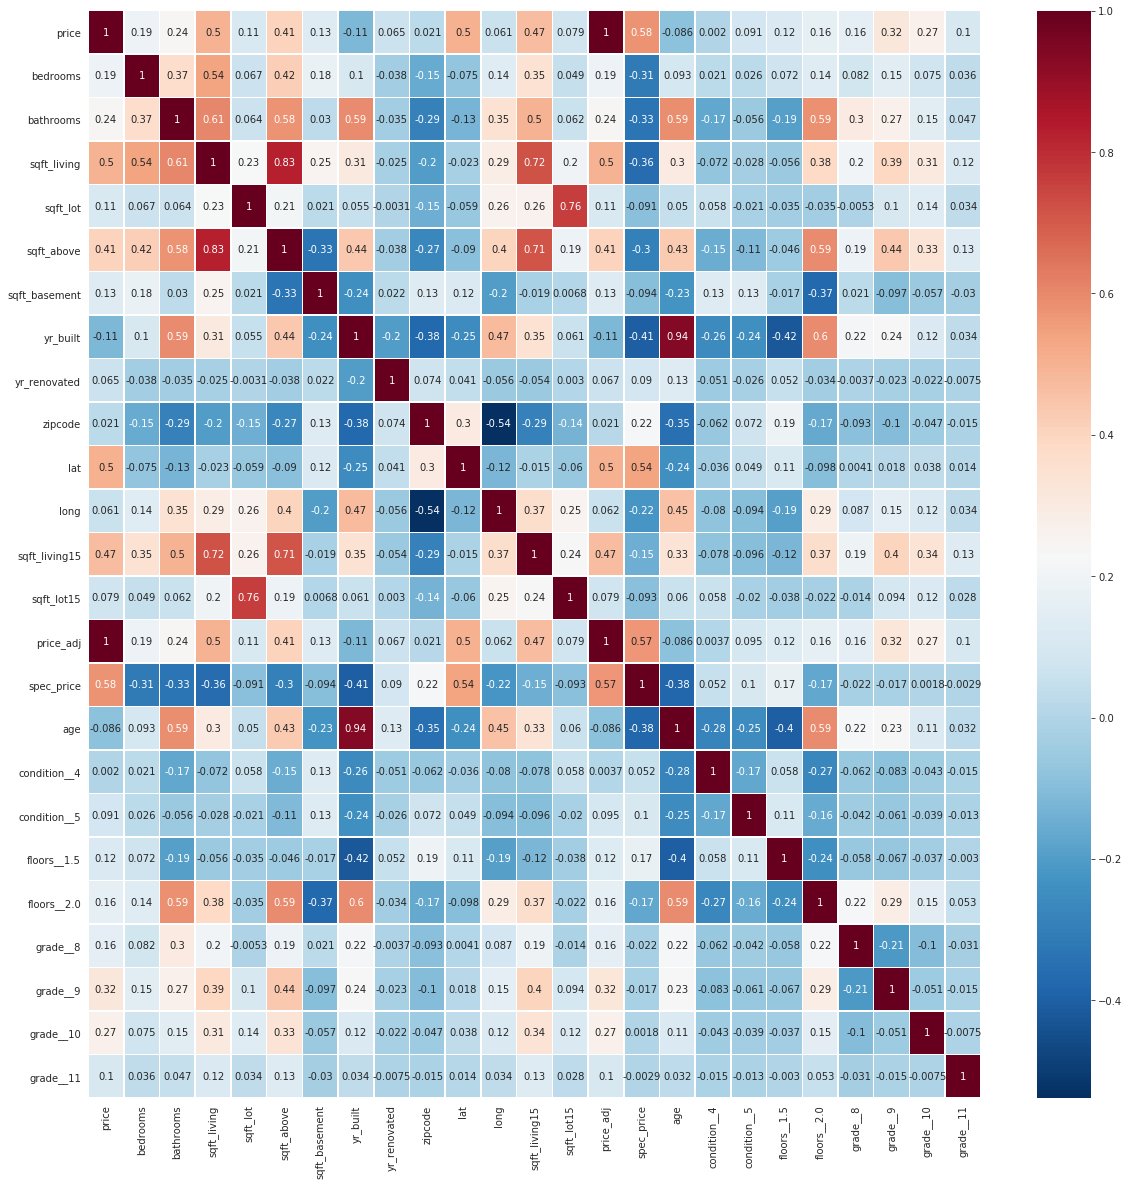

In [605]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(df.corr(), annot=True, linewidths=.5, cmap="RdBu_r")

## Predictive Modeling

Train machine learning models, evaluate their performance and use them to make predictions

### Small setup further predictions

We will create a short function to quickly compare models via train-test-evaluation. Look at the following.

In [606]:
# Define the evaluation metric
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.asanyarray(np.abs((y_true - y_pred) / y_true)) * 100)

In [607]:
def quick_train_eval(df, feat_x, feat_y, method='mult_lin', s=.2):
    X = df[feat_x]
    y = df[feat_y]
    X = preprocessing.StandardScaler().fit(X).transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=s, random_state=1)
    
    if method == 'mult_lin':
        model = linear_model.LinearRegression()
    elif method == 'poly2':
        model = linear_model.LinearRegression()
        poly = PolynomialFeatures(degree=2)
        X_train = poly.fit_transform(X_train)
        X_test = poly.fit_transform(X_test)
    elif method == 'poly3':
        model = linear_model.LinearRegression()
        poly = PolynomialFeatures(degree=3)
        X_train = poly.fit_transform(X_train)
        X_test = poly.fit_transform(X_test)
        
    model.fit(X_train,y_train)
    y_hat = model.predict(X_test)
    #print ('Coefficients: ', model.coef_)
    
    # calculate MAE, MSE, RMSE
    print('MAE\t', metrics.mean_absolute_error(y_test, y_hat))
    print('MSE\t', metrics.mean_squared_error(y_test, y_hat))
    print('RMSE\t', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))
    print('MAPE\t', mean_absolute_percentage_error(y_test, y_hat))

Let's sort the features into those we can use and those we can't or won't use. For further information look at chapter "Business Understanding" and "Data Cleaning"

In [608]:
no_predictor = ['date'
                , 'price'
                , 'sqft_lot'
                , 'zipcode'
                , 'lat'
                , 'long'
                , 'sqft_living15'
                , 'sqft_lot15']

target = ['price_adj']

preds = ['bedrooms'
         , 'bathrooms'
         , 'sqft_living'
         , 'floors'
         , 'condition'
         , 'grade'
         , 'sqft_above'
         , 'sqft_basement'
         , 'yr_built'
         , 'yr_renovated'
         , 'age']

In [609]:
quick_train_eval(df, ['sqft_living', 'age', 'bathrooms'], ['price_adj'])

MAE	 204628.0904050632
MSE	 63860209015.44211
RMSE	 252705.7755878209
MAPE	 29.70764903296801


In [610]:
df[preds].info()

KeyError: "['grade', 'floors', 'condition'] not in index"

In [ ]:
quick_train_eval(df, preds, target)

In [ ]:
quick_train_eval(df, preds, target, method='poly2')

In [ ]:
quick_train_eval(df, preds, target, method='poly3')

## Data Visualization

Communicate the findings with key stakeholder using plots and interactive visualizations

In [ ]:
# create spatial raster
# group in a spatial raster

for feat in ['long', 'lat']:
    df[feat+'_bin']=pd.cut(df[feat],bins=70)
df_rastered = df.groupby(by=['long_bin', 'lat_bin']).mean().dropna()
#df_rastered.info()

In [ ]:
# create a colormap
linear = cm.LinearColormap(
    ['blue', 'red'],
    vmin=df_rastered.price.min()*1.5, vmax=df_rastered.price.max()*0.5
)
linear

In [ ]:
# define a function to draw a basemap easily
# example from: https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples
# https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/MinMaxLimits.ipynb

def generateBaseMap(default_location=[47.5112, -121.965], default_zoom_start=10):
    base_map = folium.Map(location=default_location
                          , control_scale=True
                          , zoom_start=default_zoom_start
                          , text_color = 'white'
                          #, tiles='Cartodb dark_matter'
                         , tiles='Stamen Toner')
    return base_map
#7.606462, -121.965104
#47.5112, -122.257
basemap = generateBaseMap()

kw = {
    'radius': 3,
    'fill': True,
    #'weight': 1,
    'fill_opacity': 1
}

# add heatmap
folium.plugins.HeatMap(data=df[['lat','long','price']].groupby(['lat','long']).mean().reset_index(),
        radius=8,max_zoom=15,name='Heat Map').add_to(basemap)

In [ ]:
# add additional Layer layer_mp:mean price
layer_mp = folium.FeatureGroup('Mean price')
basemap.add_child(layer_mp)

# add the colorbar
linear.caption = 'Mean price of houses in the area in $'
linear.text_color = 'white'
linear.add_to(basemap)

# Price Markers
df_rastered.apply(lambda row:layer_mp.add_child(folium.CircleMarker(location=[row["lat"], row["long"]]
                                                 , fill_color=linear(row['price'])
                                                 , color=linear(row['price'])
                                                 , **kw)), axis=1)

folium.LayerControl().add_to(basemap)
basemap

In [ ]:
type(linear)

## Future Work